# For data exploration, we will first examine the main dataset for this project, which is the synthetic data generated by an LLM based on the original data. All synthetic data operations will have the "synthetic" prefix, and all original data will have the "og" prefix. After that examination, we will run the same tests/procedures on the original dataset to see if there are any significant discrepancies. Following the exploration of both datasets, we will move on to potentially clean the data further before engineering features. 

## Import Libraries and Load Initial Data

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import sys

raw_file_path =  "../data/raw/synthetic_train.csv"
synthetic_df = pd.read_csv(raw_file_path)
synthetic_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


## Initial Data Cleaning and Preparation
#### - Rename columns
#### - Check data shape, data types, and if there are any na values


In [105]:
# quick column rename for personal preference
# Handles spaces, special characters, etc.
synthetic_df.columns = synthetic_df.columns.str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)


print("==================")
print(synthetic_df.shape)
print("==================")
print(synthetic_df.dtypes)


# check to see if we have any null values
print(synthetic_df.count())
print(synthetic_df.isna())

(750000, 9)
id              int64
sex            object
age             int64
height        float64
weight        float64
duration      float64
heart_rate    float64
body_temp     float64
calories      float64
dtype: object
id            750000
sex           750000
age           750000
height        750000
weight        750000
duration      750000
heart_rate    750000
body_temp     750000
calories      750000
dtype: int64
           id    sex    age  height  weight  duration  heart_rate  body_temp  \
0       False  False  False   False   False     False       False      False   
1       False  False  False   False   False     False       False      False   
2       False  False  False   False   False     False       False      False   
3       False  False  False   False   False     False       False      False   
4       False  False  False   False   False     False       False      False   
...       ...    ...    ...     ...     ...       ...         ...        ...   
749995  False 

## First data quality sanity check

In [106]:
# we don't have any null values, but let's go through the data and perform some base sanity checks
# check the range of all numerical values (ensuring they are both positive and within expected ranges)
numerical_cols = ['age', 'height', 'weight', 'duration', 'heart_rate', 'body_temp', 'calories']
for col in numerical_cols:
    print(f'Column: {col} minimum value: {synthetic_df[col].min()}')
    print(f'Column: {col} maximum value: {synthetic_df[col].max()}\n')

Column: age minimum value: 20
Column: age maximum value: 79

Column: height minimum value: 126.0
Column: height maximum value: 222.0

Column: weight minimum value: 36.0
Column: weight maximum value: 132.0

Column: duration minimum value: 1.0
Column: duration maximum value: 30.0

Column: heart_rate minimum value: 67.0
Column: heart_rate maximum value: 128.0

Column: body_temp minimum value: 37.1
Column: body_temp maximum value: 41.5

Column: calories minimum value: 1.0
Column: calories maximum value: 314.0



## Convert to imperial from metric and redo sanity checks

In [107]:
# the data seems to be based in metric measurements, so to make things a bit more approachable we'll do some quick conversions to more familiar units
# convert bodyweight from kg to lbs
def kg_to_lbs(weight):
    return weight * 2.2046

synthetic_df['weight_lbs'] = kg_to_lbs(synthetic_df['weight'])

# convert celsius to farhenheit
def celsius_to_farhenheit(body_temp):
    return (body_temp * 9/5) + 32

synthetic_df['body_temp_f'] = celsius_to_farhenheit(synthetic_df['body_temp'])

# convert height from cm to in
def cm_to_in(height):
    return height / 2.54

synthetic_df['height_inches'] = cm_to_in(synthetic_df['height'])

synthetic_df.head()

,id,sex,age,height,weight,duration,heart_rate,body_temp,calories,weight_lbs,body_temp_f,height_inches
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,180.7772,105.80,74.409449
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,132.2760,103.46,64.173228
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,141.0944,103.64,63.385827
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,198.4140,105.26,75.590551
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,134.4806,105.08,65.354331


In [108]:
# let's redo range checks with the new measurement units
numerical_cols = ['age', 'height_inches', 'weight_lbs', 'duration', 'heart_rate', 'body_temp_f', 'calories']
for col in numerical_cols:
    print(f'Column: {col} minimum value: {round(synthetic_df[col].min(), 2)}')
    print(f'Column: {col} mean value: {round(synthetic_df[col].mean(), 2)}')
    print(f'Column: {col} maximum value: {round(synthetic_df[col].max(), 2)}\n')



# quick dataframe cleanup to remove cols we don't need
synthetic_df.drop(columns=['height', 'weight', 'body_temp', 'id'], inplace=True)
synthetic_df.head()

synthetic_df.describe()

Column: age minimum value: 20
Column: age mean value: 41.42
Column: age maximum value: 79

Column: height_inches minimum value: 49.61
Column: height_inches mean value: 68.78
Column: height_inches maximum value: 87.4

Column: weight_lbs minimum value: 79.37
Column: weight_lbs mean value: 165.67
Column: weight_lbs maximum value: 291.01

Column: duration minimum value: 1.0
Column: duration mean value: 15.42
Column: duration maximum value: 30.0

Column: heart_rate minimum value: 67.0
Column: heart_rate mean value: 95.48
Column: heart_rate maximum value: 128.0

Column: body_temp_f minimum value: 98.78
Column: body_temp_f mean value: 104.07
Column: body_temp_f maximum value: 106.7

Column: calories minimum value: 1.0
Column: calories mean value: 88.28
Column: calories maximum value: 314.0



,age,duration,heart_rate,calories,weight_lbs,body_temp_f,height_inches
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,15.421015,95.483995,88.282781,165.666140,104.065256,68.778616
std,15.175049,8.354095,9.449845,62.395349,30.826268,1.403774,5.049014
min,20.000000,1.000000,67.000000,1.000000,79.365600,98.780000,49.606299
25%,28.000000,8.000000,88.000000,34.000000,138.889800,103.280000,64.566929
50%,40.000000,15.000000,95.000000,77.000000,163.140400,104.540000,68.503937
75%,52.000000,23.000000,103.000000,136.000000,191.800200,105.260000,72.834646
max,79.000000,30.000000,128.000000,314.000000,291.007200,106.700000,87.401575


## Distribution Visualization

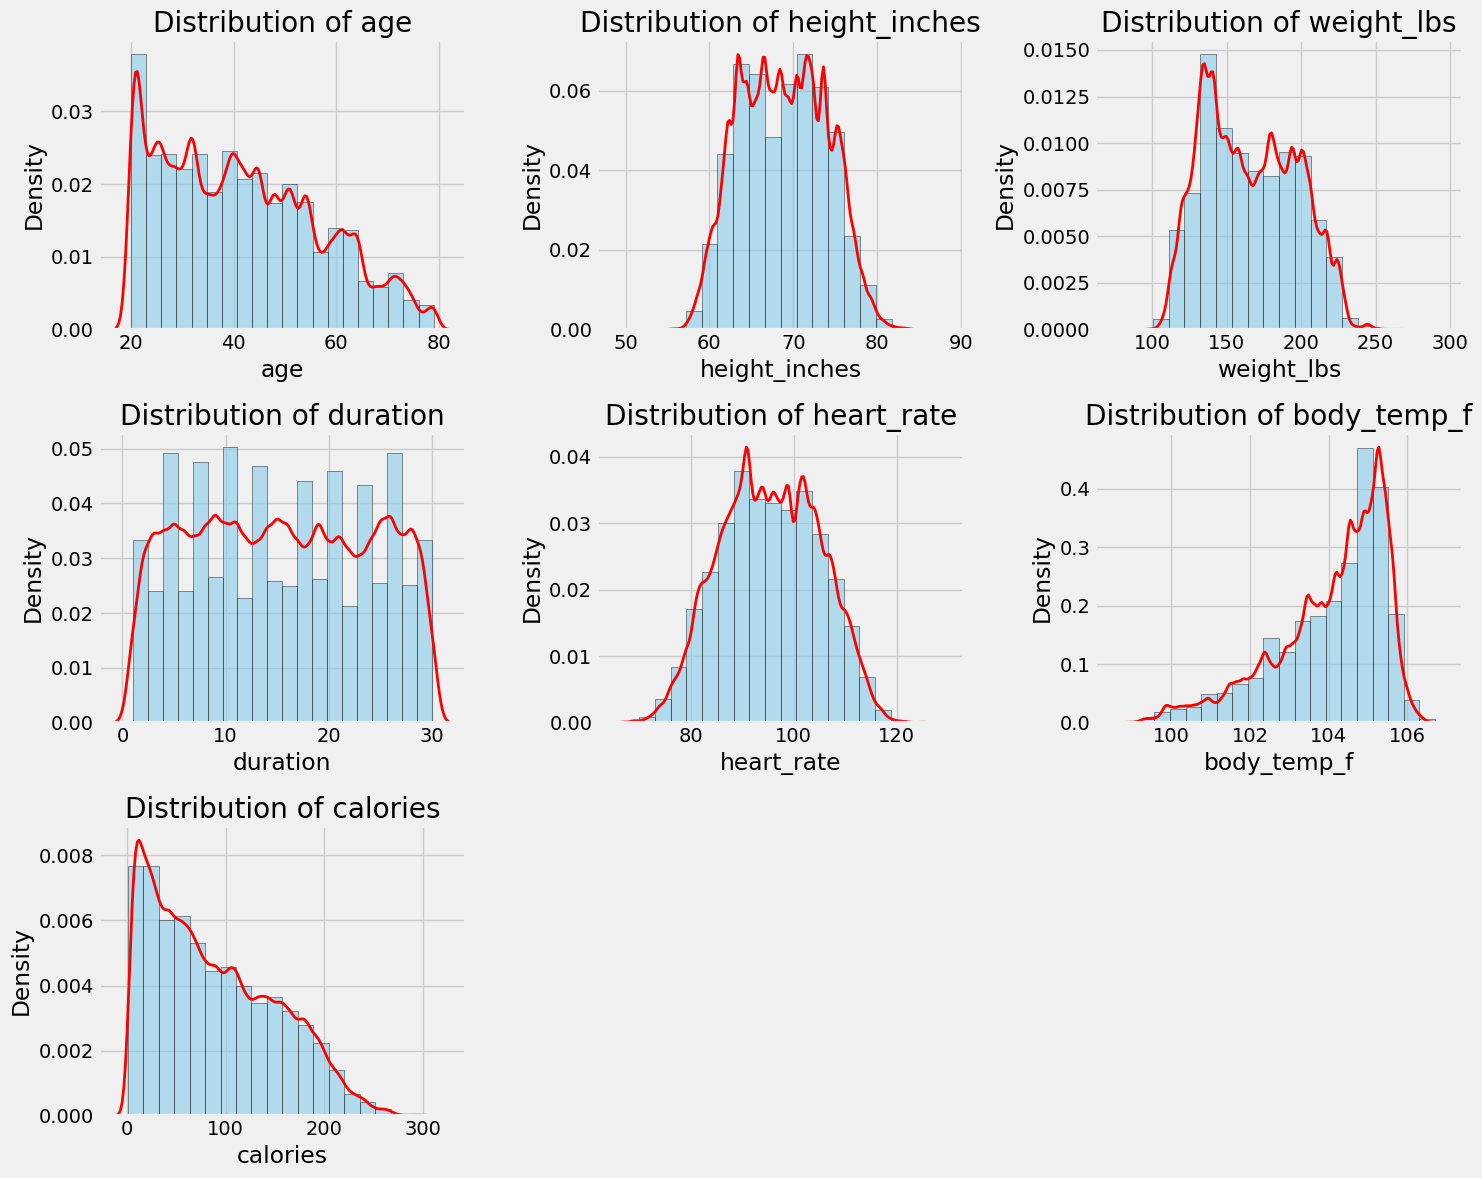

In [109]:
# now let's do quick statistical analysis of the features and get some distributions of all the variables visualized
#   (we can also use this as a check to ensure our inferred measurements were correct and follow expected patterns)

# use sturge's rule to get initial bin number
import math
num_observations = synthetic_df['age'].count()
num_bins = int(math.log2(num_observations) + 1)


# create a histogram with a kernel density estimation curve (for a smooth depiction of the probability density functions of each variable)
# calculate grid dimensions
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(synthetic_df[col], bins=num_bins, alpha=0.6, density=True, color='skyblue', edgecolor='black')

    #KDE curve
    sns.kdeplot(data=synthetic_df[col], color='red', linewidth=2, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Statistical Shape Analysis

In [110]:
'''
    Let's do a deeper dive into the skewness and kurtosis of each variable
        - Skewness -> measure of asymmetry
            - zero: symmetric
            - positive: mean is greater than the median, and the mode is less than both
                -> the right tail is longer/fatter than the left
            - negative: the mean is less than the median, and the mode is greater than both
                -> the left tail is longer/fatter than the right

        - Kurtosis -> measure of the peakness/flatness, which can indicate how much data is concentrated around the mean
            - Mesokurtic: a distribution with kurtosis = 3 (perfect normal distribution)
            - Leptokurtic: a distribution with kurtosis > 3 (sharp peak and heavy tails)
            - Platykurtic: a distribtion with kurtosis < 3 (flat peak and light tails)
'''
from scipy.stats import kurtosis


def skewness(column):
    return (3 * (column.mean() - column.median()))  / np.std(column)

for col in numerical_cols:
    print(f'Skewness of {col}: {round(skewness(synthetic_df[col]), 3)}\n')


print(f'=' * 50)

for col in numerical_cols:
    print(f'Kurtosis of {col}: {kurtosis(synthetic_df[col], fisher=False)}\n')

Skewness of age: 0.281

Skewness of height_inches: 0.163

Skewness of weight_lbs: 0.246

Skewness of duration: 0.151

Skewness of heart_rate: 0.154

Skewness of body_temp_f: -1.015

Skewness of calories: 0.542

Kurtosis of age: 2.2536588099420607

Kurtosis of height_inches: 2.160197438215404

Kurtosis of weight_lbs: 2.003921147660433

Kurtosis of duration: 1.8046095470265127

Kurtosis of heart_rate: 2.3234335500269925

Kurtosis of body_temp_f: 3.5196126941989334

Kurtosis of calories: 2.3104834564398824



## Correlation Analysis


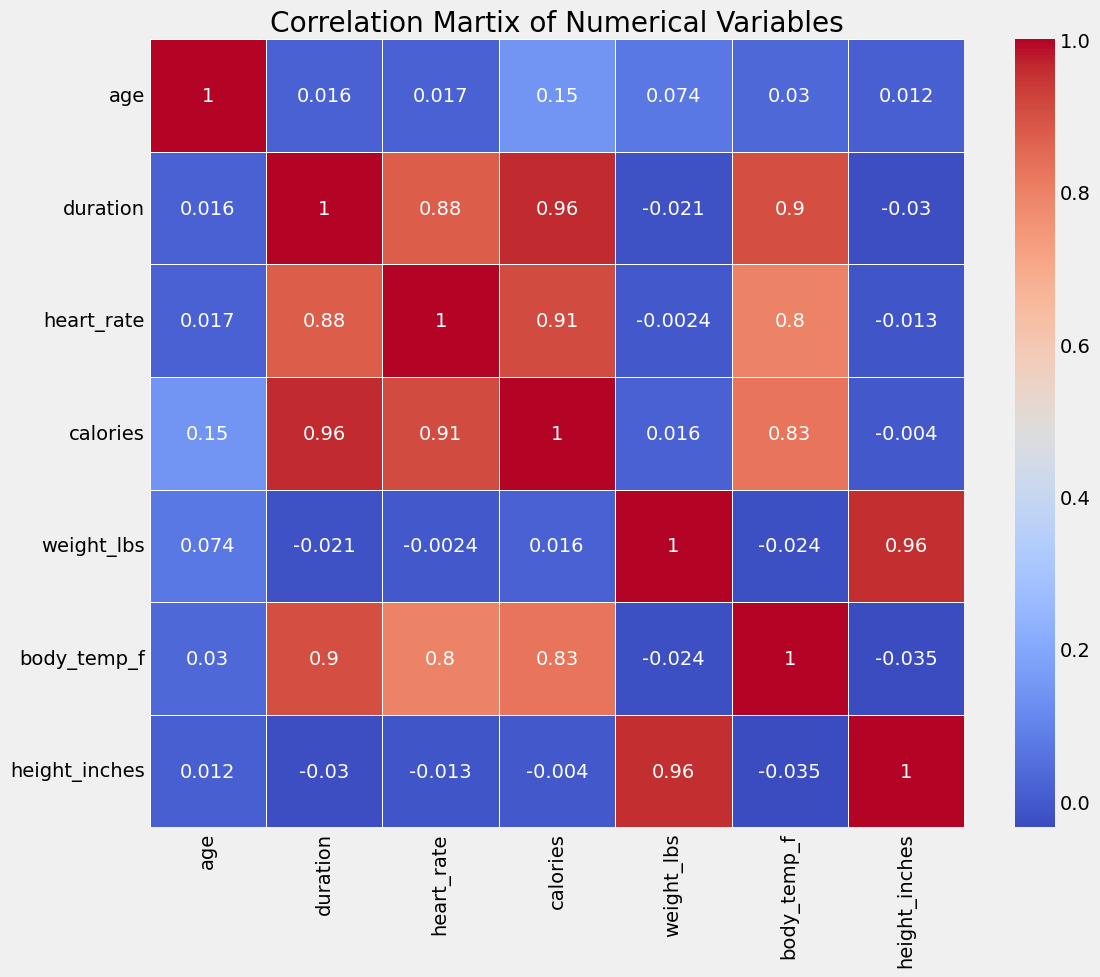

In [111]:
correlation_matrix = synthetic_df.select_dtypes(include=[np.number]).corr()

# create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Martix of Numerical Variables')
plt.tight_layout()
plt.show()

In [112]:
# display high correlation pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i,j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

high_corr_pairs.sort(key=lambda pair: abs(pair[2]), reverse=True)
print("High correlation pairs (abs value >0.7)")
print("=" * 50)
for pair in high_corr_pairs:
    print(f'{pair[0]} -- {pair[1]}: {pair[2]:.3f}')


High correlation pairs (abs value >0.7)
duration -- calories: 0.960
weight_lbs -- height_inches: 0.958
heart_rate -- calories: 0.909
duration -- body_temp_f: 0.903
duration -- heart_rate: 0.875
calories -- body_temp_f: 0.829
heart_rate -- body_temp_f: 0.796


## Relationship with Target Variable

In [113]:
# get basic r values for correlation between predictors and target variables
predictors = [col for col in numerical_cols if col != 'calories']
corr_vals = []
for i, var in enumerate(predictors):
    r = synthetic_df[var].corr(synthetic_df['calories'])
    corr_vals.append((var, r))

corr_vals.sort(key= lambda x: x[1], reverse=True)
for val in corr_vals:
    var_name = val[0]
    r_value = val[1]
    print(f'{var_name.capitalize()} vs Calories R-Value: {r_value:.3f}')



Duration vs Calories R-Value: 0.960
Heart_rate vs Calories R-Value: 0.909
Body_temp_f vs Calories R-Value: 0.829
Age vs Calories R-Value: 0.146
Weight_lbs vs Calories R-Value: 0.016
Height_inches vs Calories R-Value: -0.004


## Group Analysis

Statistics Summary by Sex
             age                                                      \
           count       mean        std   min   25%   50%   75%   max   
sex                                                                    
female  375721.0  41.273650  15.386384  20.0  28.0  40.0  52.0  79.0   
male    374279.0  41.567724  14.958469  20.0  29.0  40.0  52.0  79.0   

        duration             ... body_temp_f        height_inches             \
           count       mean  ...         75%    max         count       mean   
sex                          ...                                               
female  375721.0  15.501013  ...      105.08  106.7      375721.0  64.969370   
male    374279.0  15.340708  ...      105.26  106.7      374279.0  72.602539   

                                                                         
             std        min        25%        50%        75%        max  
sex                                                             

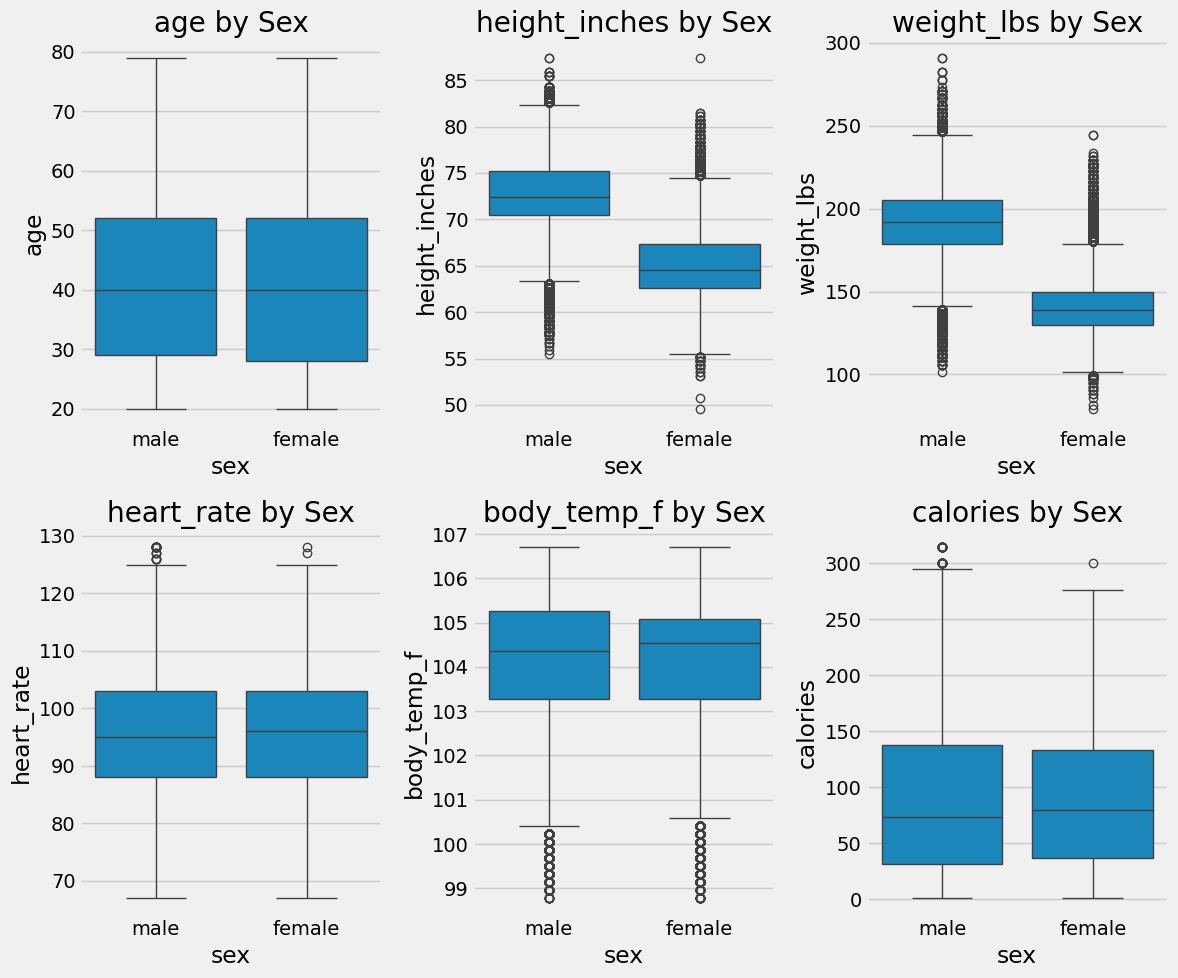

In [114]:
print("Statistics Summary by Sex")
print(synthetic_df.groupby('sex').describe())

# create box plots by sex for key variables
fig, axes = plt.subplots(2, 3, figsize=(12,10))
axes = axes.flatten() # flatten is used so that the axes are converted to a 1-D array, so it uses a single for loop to iterate rather than a double loop to iterate over row,col

key_vars = ['age', 'height_inches', 'weight_lbs', 'heart_rate', 'body_temp_f', 'calories']
for i, var in enumerate(key_vars):
    sns.boxplot(data=synthetic_df, x='sex', y=var, ax=axes[i])
    axes[i].set_title(f'{var} by Sex')

plt.tight_layout()
plt.show()



##### Outside of height and weight, there aren't any seemingly significant differences in any other variable, including the target variable.

## Outlier Detection via IQR

In [115]:
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    iqr = q3 - q1
    upper_boundary = q3 + (1.5 * iqr)
    lower_boundary = q1 - (1.5 * iqr)

    outliers = df[(df[column] < lower_boundary) | (df[column] > upper_boundary)]
    return outliers, lower_boundary, upper_boundary

# check outliers for the numerical columns
outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(synthetic_df, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(synthetic_df)) * 100,
        'lower_boundary': lower,
        'upper_boundary': upper
    }

    print(f'{col}: {len(outliers)} outliers, ({(len(outliers) / len(synthetic_df)) * 100:.2f}%)')
    print(f'Bounds: [{lower:.2f}, {upper:.2f}]')
    print()


    

age: 0 outliers, (0.00%)
Bounds: [-8.00, 88.00]

height_inches: 14 outliers, (0.00%)
Bounds: [52.17, 85.24]

weight_lbs: 9 outliers, (0.00%)
Bounds: [59.52, 271.17]

duration: 0 outliers, (0.00%)
Bounds: [-14.50, 45.50]

heart_rate: 36 outliers, (0.00%)
Bounds: [65.50, 125.50]

body_temp_f: 14919 outliers, (1.99%)
Bounds: [100.31, 108.23]

calories: 139 outliers, (0.02%)
Bounds: [-119.00, 289.00]



### Body temp has a relatively large amount of outliers, let's dig a bit further

#### Initial Thoughts:
    - The measurements are being taken during a non-normal state so we can't lean on traditional, at-rest body temperature ranges. 
        - Quick research: Expected body temp range during exercise would be between 99-101 degrees F, where as our lower boundary is right on the upper expected range, and the upper boundary is way beyond the expected range.
        - This could hint at a problem with the synthetically generated data. (Idea: test models with the original data vs with the original + synthetic data)

    - No geographic/climate/environment data, so can't do any correlation work there
    
    - Let's try to see if we can extrapolate with some quick derived features, looking at an estimated fitness_level and plotting body temperature against that calculated fitness_level and duration

In [116]:
# body temp analysis
print('===== Body Temperature Range Analysis =====')
print(f"Dataset Range: {synthetic_df['body_temp_f'].min():.1f}°F - {synthetic_df['body_temp_f'].max():.1f}°F")
print('Expected Range: 99.0°F - 101.0°F')
print('Heat Exhaustion Range: 101.0°F - 104.0°F')

# flag temperatures outside expected ranges
normal_exercise_low = 99.0
normal_exercise_high = 101.0
heat_exhaustion_high = 104.0

below_expected = (synthetic_df['body_temp_f'] < normal_exercise_low).sum()
normal_range = ((synthetic_df['body_temp_f'] >= normal_exercise_low) & (synthetic_df['body_temp_f'] <= normal_exercise_high)).sum()
above_normal = ((synthetic_df['body_temp_f'] >= normal_exercise_high) & (synthetic_df['body_temp_f'] <= heat_exhaustion_high)).sum()
dangerous = (synthetic_df['body_temp_f'] > heat_exhaustion_high).sum()

print(f'\nBelow Expected Exercise Range: (<{normal_exercise_low}°F): {below_expected:,} ({below_expected/len(synthetic_df)*100:.2f}%)')
print(f'Normal Expected Exercise Range: ({normal_exercise_low} - {normal_exercise_high}°F): {normal_range:,} ({normal_range/len(synthetic_df)*100:.2f}%)')
print(f'Elevated But Safe Range ({normal_exercise_high} - {heat_exhaustion_high}°F): {above_normal:,} ({above_normal/len(synthetic_df)*100:.2f}%)')
print(f'Dangerous Range (>{heat_exhaustion_high}°F): {dangerous:,} ({dangerous/len(synthetic_df)*100:.2f}%)')


===== Body Temperature Range Analysis =====
Dataset Range: 98.8°F - 106.7°F
Expected Range: 99.0°F - 101.0°F
Heat Exhaustion Range: 101.0°F - 104.0°F

Below Expected Exercise Range: (<99.0°F): 97 (0.01%)
Normal Expected Exercise Range: (99.0 - 101.0°F): 33,177 (4.42%)
Elevated But Safe Range (101.0 - 104.0°F): 271,619 (36.22%)
Dangerous Range (>104.0°F): 445,107 (59.35%)


In [117]:
# simple/exploratory fitness level metric, normalizing by using age-based simple formula
synthetic_df['max_theoretical_hr'] = 220 - synthetic_df['age']
synthetic_df['hr_percentage'] = round(((synthetic_df['heart_rate'] / synthetic_df['max_theoretical_hr']) * 100), 3)

# calories per min
synthetic_df['calorie_burn_rate'] = synthetic_df['calories'] / synthetic_df['duration']

# create a fitness score using the above two metrics, where the lower HR percentage is better, and higher burn rate is better
from sklearn.preprocessing import MinMaxScaler
# normalize to 0-100 scale 
scaler = MinMaxScaler()
hr_scaled = scaler.fit_transform(synthetic_df[['hr_percentage']])
calorie_scaled = scaler.fit_transform(synthetic_df[['calorie_burn_rate']])

# need to invert the hr scaled since lower is better and place higher weight on that
synthetic_df['fitness_score'] = (100 - hr_scaled.flatten() * 100) * .6 + (calorie_scaled.flatten() * 100) * .4


print("Fitness proxy variables created:")
print(f"- HR Percentage (lower = fitter): {synthetic_df['hr_percentage'].min():.1f}% - {synthetic_df['hr_percentage'].max():.1f}%")
print(f"- Calorie Rate: {synthetic_df['calorie_burn_rate'].min():.1f} - {synthetic_df['calorie_burn_rate'].max():.1f} cal/min")
print(f"- Combined Fitness Score: {synthetic_df['fitness_score'].min():.1f} - {synthetic_df['fitness_score'].max():.1f}\n")


print("===== CORRELATION ANALYSIS =====")
fitness_correlations = synthetic_df[['body_temp_f', 'hr_percentage', 'calorie_burn_rate', 'fitness_score', 'duration']].corr()['body_temp_f']
print("Body temperature correlations:")
for var, corr in fitness_correlations.items():
    if var != 'body_temp_f':
        print(f"  {var}: {corr:.3f}")
print()


Fitness proxy variables created:
- HR Percentage (lower = fitter): 33.5% - 90.8%
- Calorie Rate: 0.1 - 189.0 cal/min
- Combined Fitness Score: 2.1 - 74.6

===== CORRELATION ANALYSIS =====
Body temperature correlations:
  hr_percentage: 0.602
  calorie_burn_rate: 0.681
  fitness_score: -0.595
  duration: 0.903



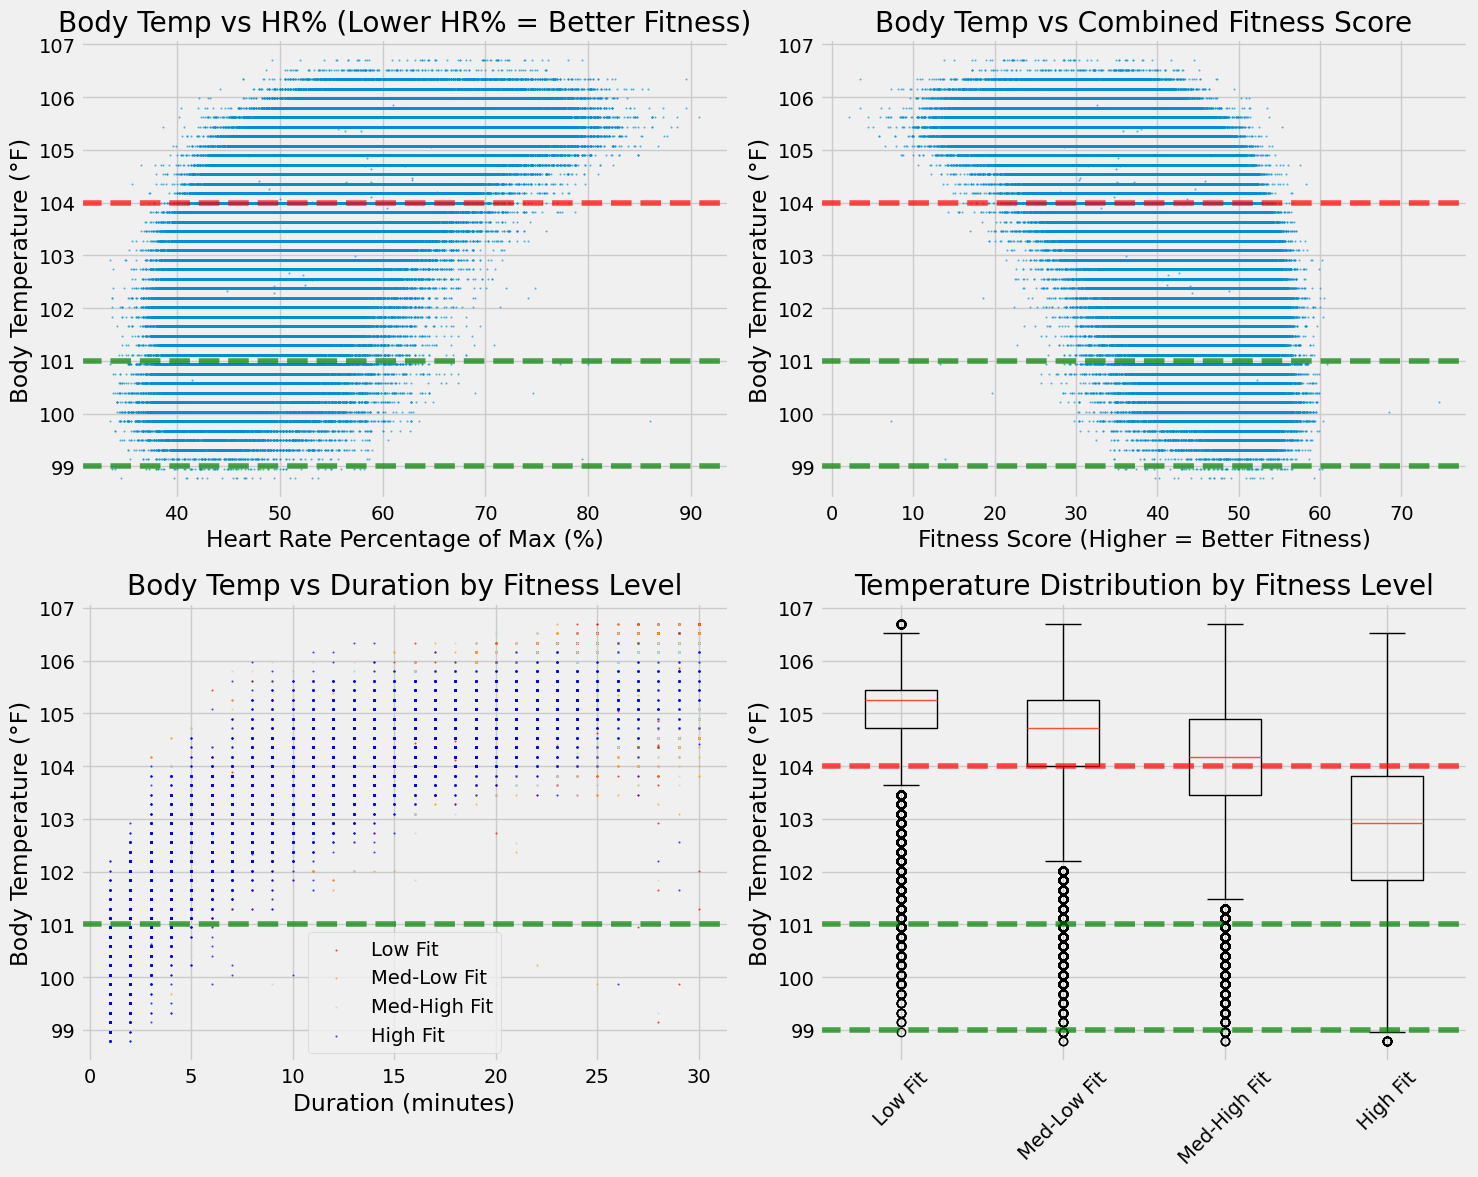

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: HR Percentage vs Body Temp
axes[0, 0].scatter(synthetic_df['hr_percentage'], synthetic_df['body_temp_f'], alpha=0.5, s=1)
axes[0, 0].set_xlabel('Heart Rate Percentage of Max (%)')
axes[0, 0].set_ylabel('Body Temperature (°F)')
axes[0, 0].set_title('Body Temp vs HR% (Lower HR% = Better Fitness)')
axes[0, 0].axhline(y=normal_exercise_low, color='green', linestyle='--', alpha=0.7, label='Expected Range')
axes[0, 0].axhline(y=normal_exercise_high, color='green', linestyle='--', alpha=0.7)
axes[0, 0].axhline(y=heat_exhaustion_high, color='red', linestyle='--', alpha=0.7, label='Heat Exhaustion')

# Plot 2: Fitness Score vs Body Temp
axes[0, 1].scatter(synthetic_df['fitness_score'], synthetic_df['body_temp_f'], alpha=0.5, s=1)
axes[0, 1].set_xlabel('Fitness Score (Higher = Better Fitness)')
axes[0, 1].set_ylabel('Body Temperature (°F)')
axes[0, 1].set_title('Body Temp vs Combined Fitness Score')
axes[0, 1].axhline(y=normal_exercise_low, color='green', linestyle='--', alpha=0.7)
axes[0, 1].axhline(y=normal_exercise_high, color='green', linestyle='--', alpha=0.7)
axes[0, 1].axhline(y=heat_exhaustion_high, color='red', linestyle='--', alpha=0.7)

# Plot 3: Duration vs Body Temp by Fitness Quartiles
synthetic_df['fitness_quartile'] = pd.qcut(synthetic_df['fitness_score'], 4, labels=['Low Fit', 'Med-Low Fit', 'Med-High Fit', 'High Fit'])
colors = ['red', 'orange', 'lightblue', 'blue']
for i, quartile in enumerate(['Low Fit', 'Med-Low Fit', 'Med-High Fit', 'High Fit']):
    subset = synthetic_df[synthetic_df['fitness_quartile'] == quartile]
    axes[1, 0].scatter(subset['duration'], subset['body_temp_f'], 
                      alpha=0.6, s=1, color=colors[i], label=quartile)
axes[1, 0].set_xlabel('Duration (minutes)')
axes[1, 0].set_ylabel('Body Temperature (°F)')
axes[1, 0].set_title('Body Temp vs Duration by Fitness Level')
axes[1, 0].legend()
axes[1, 0].axhline(y=normal_exercise_high, color='green', linestyle='--', alpha=0.7)

# Plot 4: Temperature Distribution by Fitness Quartile
fitness_quartiles = ['Low Fit', 'Med-Low Fit', 'Med-High Fit', 'High Fit']
temp_by_fitness = [synthetic_df[synthetic_df['fitness_quartile'] == q]['body_temp_f'].values for q in fitness_quartiles]
axes[1, 1].boxplot(temp_by_fitness, labels=fitness_quartiles)
axes[1, 1].set_ylabel('Body Temperature (°F)')
axes[1, 1].set_title('Temperature Distribution by Fitness Level')
axes[1, 1].axhline(y=normal_exercise_low, color='green', linestyle='--', alpha=0.7, label='Expected Range')
axes[1, 1].axhline(y=normal_exercise_high, color='green', linestyle='--', alpha=0.7)
axes[1, 1].axhline(y=heat_exhaustion_high, color='red', linestyle='--', alpha=0.7, label='Heat Exhaustion')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [119]:
print("=== BODY TEMPERATURE BY FITNESS QUARTILE ===")
fitness_analysis = synthetic_df.groupby('fitness_quartile')['body_temp_f'].agg(['count', 'mean', 'std', 'min', 'max'])
print(fitness_analysis.round(2))
print()

# Check if fitness explains temperature regulation
print("=== FITNESS LEVEL TEMPERATURE REGULATION ANALYSIS ===")
for quartile in fitness_quartiles:
    subset = synthetic_df[synthetic_df['fitness_quartile'] == quartile]
    dangerous_pct = (subset['body_temp_f'] > heat_exhaustion_high).sum() / len(subset) * 100
    normal_pct = ((subset['body_temp_f'] >= normal_exercise_low) & 
                  (subset['body_temp_f'] <= normal_exercise_high)).sum() / len(subset) * 100
    
    print(f"{quartile}:")
    print(f"  Normal exercise range: {normal_pct:.1f}%")
    print(f"  Dangerous temperatures: {dangerous_pct:.1f}%")
    print(f"  Mean temp: {subset['body_temp_f'].mean():.2f}°F")
    print()

=== BODY TEMPERATURE BY FITNESS QUARTILE ===
                   count    mean   std    min     max
fitness_quartile                                     
Low Fit           187509  104.99  0.78  98.96  106.70
Med-Low Fit       187492  104.53  1.05  98.78  106.70
Med-High Fit      187530  103.99  1.20  98.78  106.70
High Fit          187469  102.74  1.38  98.78  106.52

=== FITNESS LEVEL TEMPERATURE REGULATION ANALYSIS ===
Low Fit:
  Normal exercise range: 0.3%
  Dangerous temperatures: 88.6%
  Mean temp: 104.99°F

Med-Low Fit:
  Normal exercise range: 1.3%
  Dangerous temperatures: 74.4%
  Mean temp: 104.53°F

Med-High Fit:
  Normal exercise range: 2.9%
  Dangerous temperatures: 56.3%
  Mean temp: 103.99°F

High Fit:
  Normal exercise range: 13.3%
  Dangerous temperatures: 18.1%
  Mean temp: 102.74°F



### Synthetic Data Quality Issues - Body Temperature Analysis

**Major red flags discovered in the synthetic dataset that suggest the generation algorithm didn't follow exercise physiology:**

- **Temperature distribution is completely unrealistic:**
 - 59.35% of readings are in the "dangerous" range (>104°F) - in real life this should be <1%
 - Only 4.42% fall in the expected exercise range (99-101°F) - should be 80-90%
 - Mean temperatures by fitness level range from 102.7°F to 105°F - people would literally collapse from heat stroke at these temps during sustained exercise

- **Duration-temperature correlation of 0.903 is a giveaway:**
 - This is way too strong - real exercise should show weak correlation (0.1-0.3)
 - Suggests the synthetic algorithm used a simple linear relationship: longer exercise = much higher temp
 - Real physiology: body temp rises initially then plateaus due to thermoregulation

- **Fitness relationships make biological sense but the absolute values don't:**
 - Higher fitness → lower body temp (correlation -0.595 is good)
 - BUT even the "highest fit" group averages 102.7°F - still too hot for real sustained exercise
 - "Low fit" group averaging 105°F would be in medical emergency territory

- **Key takeaway: The synthetic generation algorithm ignored physiological constraints**
 - Likely used simple mathematical relationships without domain knowledge
 - Temperature should be capped at realistic exercise ranges (99-104°F max)
 - This could seriously mislead our models if not addressed

**Next step:** Rerun this entire analysis with the original dataset to see if these issues exist there, or if it's purely a synthetic data artifact. If the original data is realistic, we'll need to either cap temperatures or exclude the synthetic data for body temperature modeling.

# Moving on to the original data

### Load data

In [164]:
og_raw_file_path = "../data/raw/og_calories.csv"
og_df = pd.read_csv(og_raw_file_path)
og_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### Initial data cleaning and preparation

In [165]:
og_df.columns = og_df.columns.str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)
og_df.rename(columns={'gender': 'sex'}, inplace=True)
print("==================")
print(og_df.shape)
print("==================")
print(og_df.dtypes)

(15000, 9)
user_id         int64
sex            object
age             int64
height        float64
weight        float64
duration      float64
heart_rate    float64
body_temp     float64
calories      float64
dtype: object


In [166]:
# check to see if we have any null values
print(og_df.count())
print(og_df.isna())

user_id       15000
sex           15000
age           15000
height        15000
weight        15000
duration      15000
heart_rate    15000
body_temp     15000
calories      15000
dtype: int64
       user_id    sex    age  height  weight  duration  heart_rate  body_temp  \
0        False  False  False   False   False     False       False      False   
1        False  False  False   False   False     False       False      False   
2        False  False  False   False   False     False       False      False   
3        False  False  False   False   False     False       False      False   
4        False  False  False   False   False     False       False      False   
...        ...    ...    ...     ...     ...       ...         ...        ...   
14995    False  False  False   False   False     False       False      False   
14996    False  False  False   False   False     False       False      False   
14997    False  False  False   False   False     False       False      False 

### First data quality sanity check

In [167]:
numerical_cols = ['age', 'height', 'weight', 'duration', 'heart_rate', 'body_temp', 'calories']
for col in numerical_cols:
    print(f'Column {col} minimum value: {og_df[col].min()}')
    print(f'Column {col} mean value: {og_df[col].mean():.2f}')
    print(f'Column {col} maximum value: {og_df[col].max()}\n')

Column age minimum value: 20
Column age mean value: 42.79
Column age maximum value: 79

Column height minimum value: 123.0
Column height mean value: 174.47
Column height maximum value: 222.0

Column weight minimum value: 36.0
Column weight mean value: 74.97
Column weight maximum value: 132.0

Column duration minimum value: 1.0
Column duration mean value: 15.53
Column duration maximum value: 30.0

Column heart_rate minimum value: 67.0
Column heart_rate mean value: 95.52
Column heart_rate maximum value: 128.0

Column body_temp minimum value: 37.1
Column body_temp mean value: 40.03
Column body_temp maximum value: 41.5

Column calories minimum value: 1.0
Column calories mean value: 89.54
Column calories maximum value: 314.0



In [168]:
# convert to imperial from metric
og_df['weight_lbs'] = kg_to_lbs(og_df['weight'])
og_df['body_temp_f'] = celsius_to_farhenheit(og_df['body_temp'])
og_df['height_inches'] = cm_to_in(og_df['height'])

og_df.head()

,user_id,sex,age,height,weight,duration,heart_rate,body_temp,calories,weight_lbs,body_temp_f,height_inches
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,207.2324,105.44,74.803150
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,132.2760,104.54,65.354331
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,174.1634,101.66,70.472441
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,156.5266,104.90,70.472441
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,127.8668,103.64,60.629921


In [169]:
numerical_cols = ['age', 'height_inches', 'weight_lbs', 'duration', 'heart_rate', 'body_temp_f', 'calories']
for col in numerical_cols:
    print(f'Column {col} minimum value: {og_df[col].min():.2f}')
    print(f'Column {col} mean value: {og_df[col].mean():.2f}')
    print(f'Column {col} maximum value: {og_df[col].max():.2f}\n')

Column age minimum value: 20.00
Column age mean value: 42.79
Column age maximum value: 79.00

Column height_inches minimum value: 48.43
Column height_inches mean value: 68.69
Column height_inches maximum value: 87.40

Column weight_lbs minimum value: 79.37
Column weight_lbs mean value: 165.27
Column weight_lbs maximum value: 291.01

Column duration minimum value: 1.00
Column duration mean value: 15.53
Column duration maximum value: 30.00

Column heart_rate minimum value: 67.00
Column heart_rate mean value: 95.52
Column heart_rate maximum value: 128.00

Column body_temp_f minimum value: 98.78
Column body_temp_f mean value: 104.05
Column body_temp_f maximum value: 106.70

Column calories minimum value: 1.00
Column calories mean value: 89.54
Column calories maximum value: 314.00



In [170]:
# quick df cleanup

og_df.drop(columns=['height', 'weight', 'body_temp', 'user_id'], inplace=True)
og_df.head()

,sex,age,duration,heart_rate,calories,weight_lbs,body_temp_f,height_inches
0,male,68,29.0,105.0,231.0,207.2324,105.44,74.803150
1,female,20,14.0,94.0,66.0,132.2760,104.54,65.354331
2,male,69,5.0,88.0,26.0,174.1634,101.66,70.472441
3,female,34,13.0,100.0,71.0,156.5266,104.90,70.472441
4,female,27,10.0,81.0,35.0,127.8668,103.64,60.629921


### Distribution Visualization

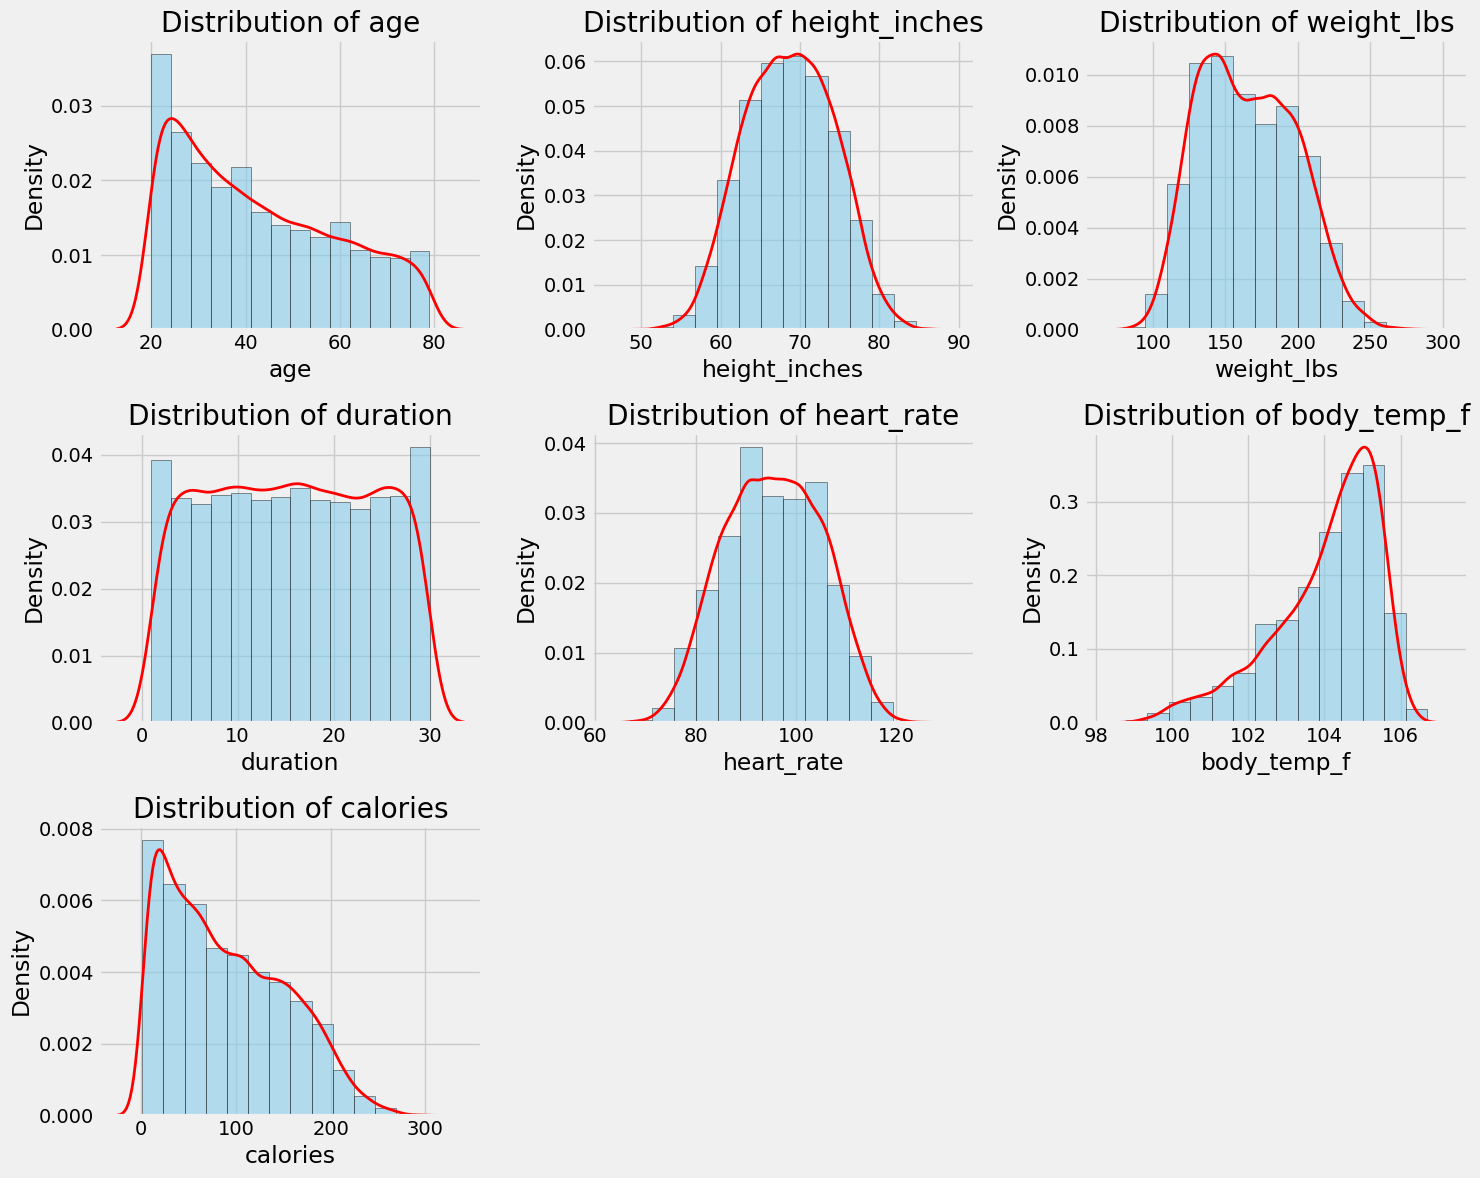

In [171]:
num_observations = og_df['age'].count()
num_bins = int(math.log2(num_observations) + 1) # Sturge's Rule

num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(og_df[col], bins=num_bins, alpha=0.6, density=True, color='skyblue', edgecolor='black')

    # KDE curve
    sns.kdeplot(data=og_df[col], color='red', linewidth=2, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [172]:
# deeper dive into skew and kurtosis

for col in numerical_cols:
    print(f'Skewness of {col}: {skewness(og_df[col]):.3f}')

print()
print("=" * 50)

for col in numerical_cols:
    print(f'Kurtosis of {col}: {kurtosis(og_df[col], fisher=False):.3f}')

Skewness of age: 0.670
Skewness of height_inches: -0.113
Skewness of weight_lbs: 0.193
Skewness of duration: -0.169
Skewness of heart_rate: -0.151
Skewness of body_temp_f: -0.672
Skewness of calories: 0.506

Kurtosis of age: 2.051
Kurtosis of height_inches: 2.487
Kurtosis of weight_lbs: 2.318
Kurtosis of duration: 1.815
Kurtosis of heart_rate: 2.356
Kurtosis of body_temp_f: 3.517
Kurtosis of calories: 2.282


### Correlation Analysis

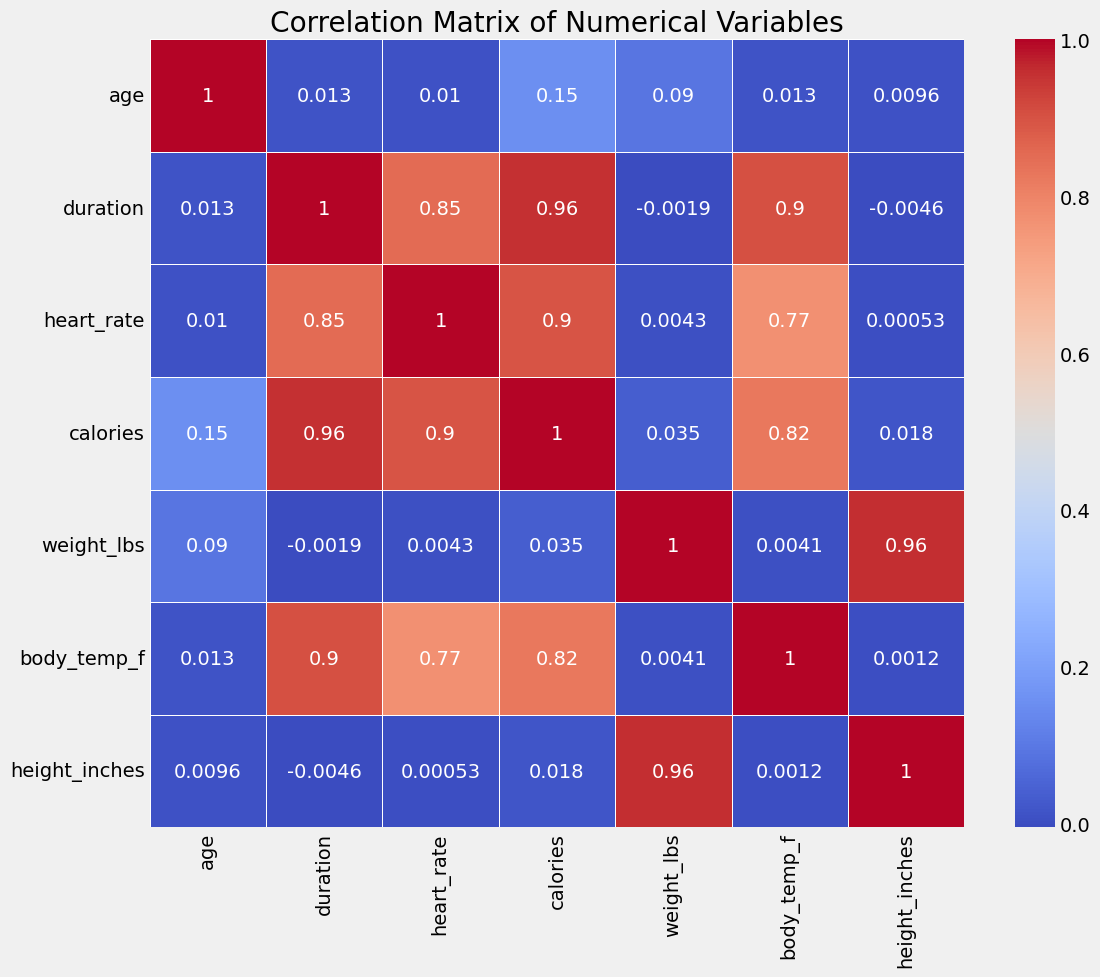

In [173]:
correlation_matrix = og_df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

In [174]:
# display high correlation pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i,j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

high_corr_pairs.sort(key= lambda pair: abs(pair[2]), reverse=True)
print('High correlation pairs (abs value > 0.7)')
print("=" * 50)
for pair in high_corr_pairs:
    print(f'{pair[0]} -- {pair[1]}: {pair[2]:.3f}')

High correlation pairs (abs value > 0.7)
weight_lbs -- height_inches: 0.958
duration -- calories: 0.955
duration -- body_temp_f: 0.903
heart_rate -- calories: 0.898
duration -- heart_rate: 0.853
calories -- body_temp_f: 0.825
heart_rate -- body_temp_f: 0.772


### Relationship with Target Variable

In [175]:
# get basic r values
predictors = [col for col in numerical_cols if col != 'calories']
corr_vals = []
for i, var in enumerate(predictors):
    r = og_df[var].corr(og_df['calories'])
    corr_vals.append((var, r))

corr_vals.sort(key= lambda x: x[1], reverse=True)
for val in corr_vals:
    var_name = val[0]
    r_value = val[1]
    print(f'{var_name.capitalize()} vs Calories R-Value: {r_value:.3f}')

Duration vs Calories R-Value: 0.955
Heart_rate vs Calories R-Value: 0.898
Body_temp_f vs Calories R-Value: 0.825
Age vs Calories R-Value: 0.154
Weight_lbs vs Calories R-Value: 0.035
Height_inches vs Calories R-Value: 0.018


### Group Analysis


Statistics Summary by Sex
           age                                                     duration  \
         count       mean        std   min   25%   50%   75%   max    count   
sex                                                                           
female  7553.0  42.735469  16.939220  20.0  28.0  40.0  56.0  79.0   7553.0   
male    7447.0  42.844904  17.022752  20.0  28.0  39.0  56.0  79.0   7447.0   

                   ... body_temp_f        height_inches                       \
             mean  ...         75%    max         count       mean       std   
sex                ...                                                         
female  15.502185  ...      105.08  106.7        7553.0  64.726745  3.972117   
male    15.559420  ...      105.08  106.7        7447.0  72.703747  3.927629   

                                                               
              min        25%        50%        75%        max  
sex                                              

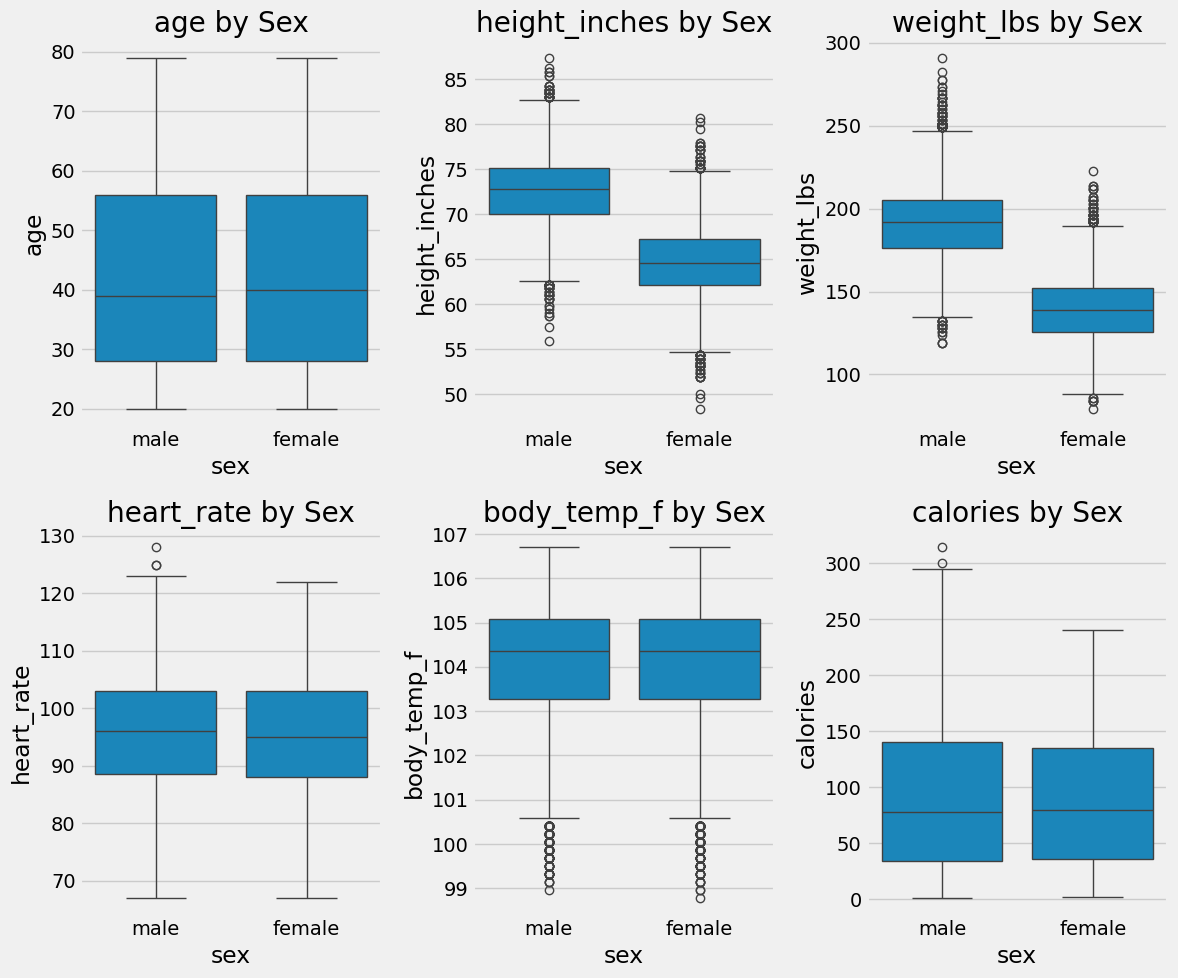

In [176]:
print("Statistics Summary by Sex")
print(og_df.groupby('sex').describe())

# create box plots by sex for key variables
fig, axes = plt.subplots(2, 3, figsize=(12,10))
axes = axes.flatten() # flatten is used so that the axes are converted to a 1-D array, so it uses a single for loop to iterate rather than a double loop to iterate over row,col

key_vars = ['age', 'height_inches', 'weight_lbs', 'heart_rate', 'body_temp_f', 'calories']
for i, var in enumerate(key_vars):
    sns.boxplot(data=og_df, x='sex', y=var, ax=axes[i])
    axes[i].set_title(f'{var} by Sex')

plt.tight_layout()
plt.show()

### Outlier Detection via IQR

In [178]:
outlier_summary = {}

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(og_df, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(og_df)) * 100,
        'lower_boundary': lower,
        'upper_boundary': upper
    }
    print(f'{col}: {len(outliers)} outliers, ({(len(outliers) / len(synthetic_df)) * 100:.2f}%)')
    print(f'Bounds: [{lower:.2f}, {upper:.2f}]')
    print()

age: 0 outliers, (0.00%)
Bounds: [-14.00, 98.00]

height_inches: 14 outliers, (0.00%)
Bounds: [52.17, 85.24]

weight_lbs: 6 outliers, (0.00%)
Bounds: [59.52, 271.17]

duration: 0 outliers, (0.00%)
Bounds: [-14.50, 45.50]

heart_rate: 1 outliers, (0.00%)
Bounds: [65.50, 125.50]

body_temp_f: 369 outliers, (0.05%)
Bounds: [100.58, 107.78]

calories: 4 outliers, (0.00%)
Bounds: [-119.50, 292.50]



### The same unexpected values for body temp still persists, but we will run the same analysis regardless and visit this again later during our overall summary/findings at the end of the file

In [180]:

# body temp analysis
print('===== Body Temperature Range Analysis =====')
print(f"Dataset Range: {og_df['body_temp_f'].min():.1f}°F - {og_df['body_temp_f'].max():.1f}°F")
print('Expected Range: 99.0°F - 101.0°F')
print('Heat Exhaustion Range: 101.0°F - 104.0°F')

# flag temperatures outside expected ranges
normal_exercise_low = 99.0
normal_exercise_high = 101.0
heat_exhaustion_high = 104.0

below_expected = (og_df['body_temp_f'] < normal_exercise_low).sum()
normal_range = ((og_df['body_temp_f'] >= normal_exercise_low) & (og_df['body_temp_f'] <= normal_exercise_high)).sum()
above_normal = ((og_df['body_temp_f'] >= normal_exercise_high) & (og_df['body_temp_f'] <= heat_exhaustion_high)).sum()
dangerous = (og_df['body_temp_f'] > heat_exhaustion_high).sum()

print(f'\nBelow Expected Exercise Range: (<{normal_exercise_low}°F): {below_expected:,} ({below_expected/len(og_df)*100:.2f}%)')
print(f'Normal Expected Exercise Range: ({normal_exercise_low} - {normal_exercise_high}°F): {normal_range:,} ({normal_range/len(og_df)*100:.2f}%)')
print(f'Elevated But Safe Range ({normal_exercise_high} - {heat_exhaustion_high}°F): {above_normal:,} ({above_normal/len(og_df)*100:.2f}%)')
print(f'Dangerous Range (>{heat_exhaustion_high}°F): {dangerous:,} ({dangerous/len(og_df)*100:.2f}%)')

===== Body Temperature Range Analysis =====
Dataset Range: 98.8°F - 106.7°F
Expected Range: 99.0°F - 101.0°F
Heat Exhaustion Range: 101.0°F - 104.0°F

Below Expected Exercise Range: (<99.0°F): 4 (0.03%)
Normal Expected Exercise Range: (99.0 - 101.0°F): 664 (4.43%)
Elevated But Safe Range (101.0 - 104.0°F): 5,503 (36.69%)
Dangerous Range (>104.0°F): 8,829 (58.86%)


In [188]:
# simple/exploratory fitness level metric, normalizing by using age-based simple formula
og_df['max_theoretical_hr'] = 220 - og_df['age']
og_df['hr_percentage'] = round(((og_df['heart_rate'] / og_df['max_theoretical_hr']) * 100), 3)

# calories per min
og_df['calorie_burn_rate'] = og_df['calories'] / og_df['duration']

# create a fitness score using the above two metrics, where the lower HR percentage is better, and higher burn rate is better
# normalize to 0-100 scale 
hr_scaled = scaler.fit_transform(og_df[['hr_percentage']])
calorie_scaled = scaler.fit_transform(og_df[['calorie_burn_rate']])

# need to invert the hr scaled since lower is better and place higher weight on that
og_df['fitness_score'] = (100 - hr_scaled.flatten() * 100) * .6 + (calorie_scaled.flatten() * 100) * .4


print("Fitness proxy variables created:")
print(f"- HR Percentage Range (lower = fitter): {og_df['hr_percentage'].min():.1f}% - {og_df['hr_percentage'].max():.1f}%")
print(f"- Calorie Burn Rate Range: {og_df['calorie_burn_rate'].min():.1f} - {og_df['calorie_burn_rate'].max():.1f} cal/min")
print(f"- Combined Fitness Score Range: {og_df['fitness_score'].min():.1f} - {og_df['fitness_score'].max():.1f}\n")


print("===== CORRELATION ANALYSIS =====")
fitness_correlations = og_df[['body_temp_f', 'hr_percentage', 'calorie_burn_rate', 'fitness_score', 'duration']].corr()['body_temp_f'].sort_values(ascending=False)
print("Body temperature correlations:")
for var, corr in fitness_correlations.items():
    if var != 'body_temp_f':
        print(f"  {var}: {corr:.3f}")
print()

Fitness proxy variables created:
- HR Percentage Range (lower = fitter): 34.7% - 84.8%
- Calorie Burn Rate Range: 0.5 - 11.2 cal/min
- Combined Fitness Score Range: 31.8 - 65.6

===== CORRELATION ANALYSIS =====
Body temperature correlations:
  duration: 0.903
  calorie_burn_rate: 0.672
  hr_percentage: 0.547
  fitness_score: -0.303



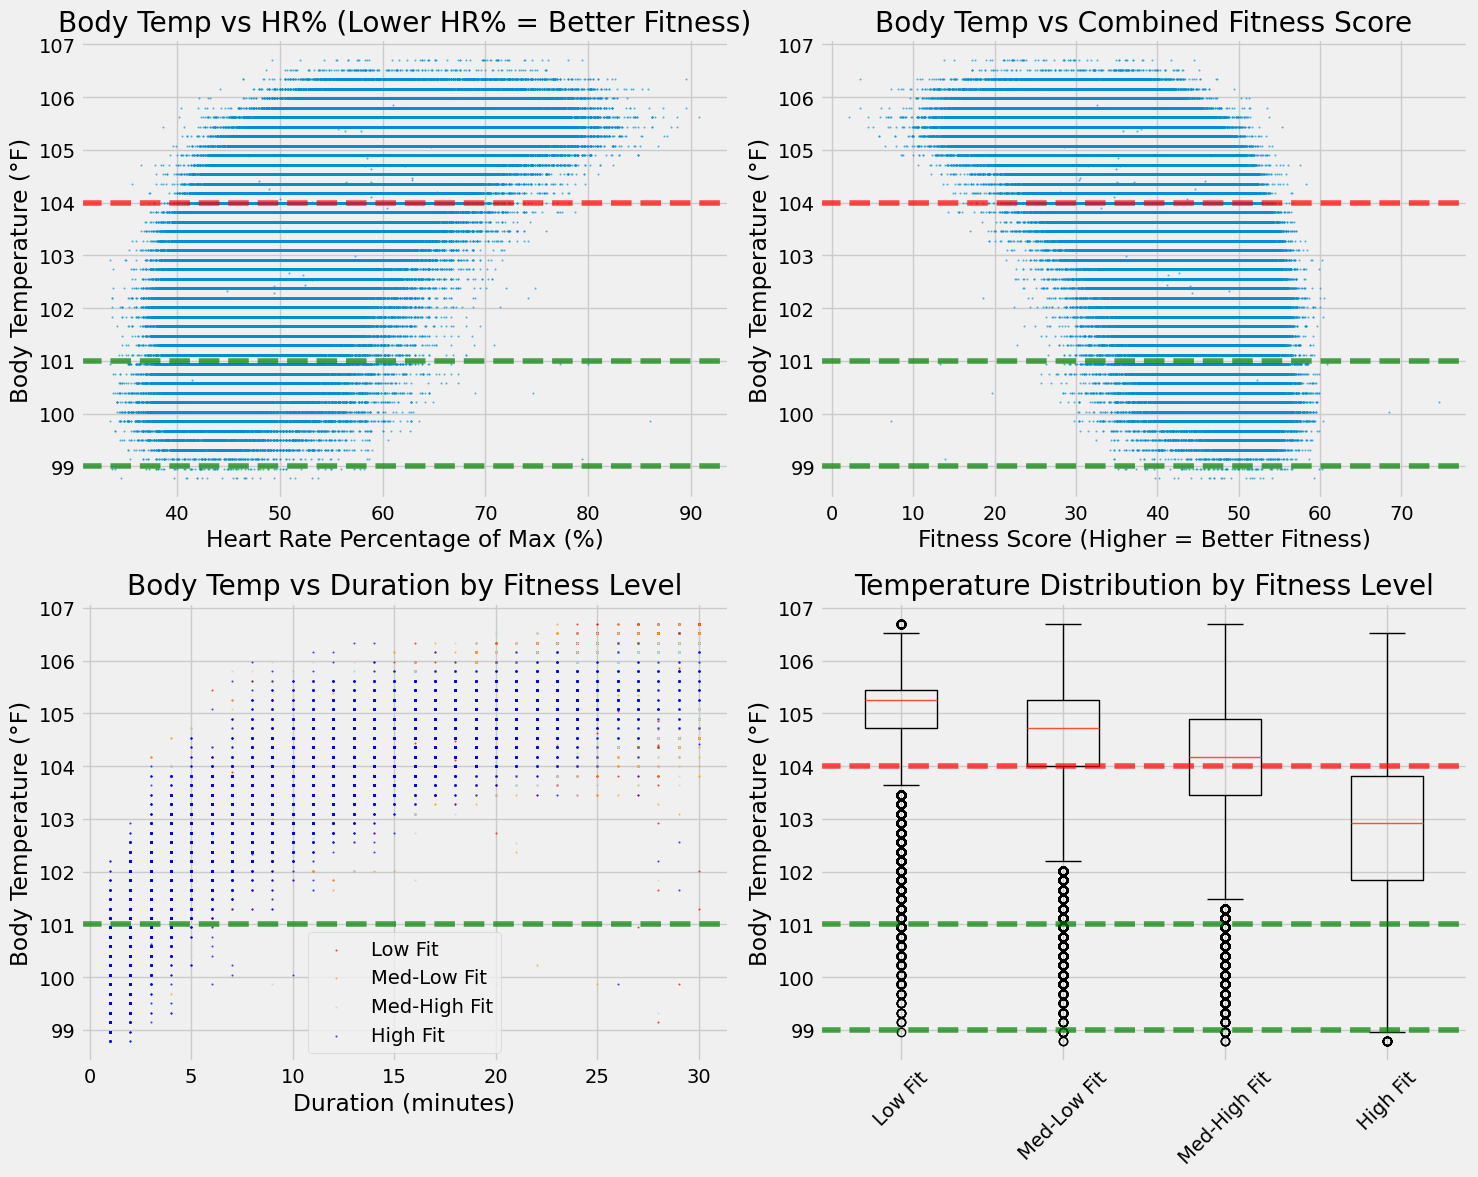

In [189]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: HR Percentage vs Body Temp
axes[0, 0].scatter(synthetic_df['hr_percentage'], synthetic_df['body_temp_f'], alpha=0.5, s=1)
axes[0, 0].set_xlabel('Heart Rate Percentage of Max (%)')
axes[0, 0].set_ylabel('Body Temperature (°F)')
axes[0, 0].set_title('Body Temp vs HR% (Lower HR% = Better Fitness)')
axes[0, 0].axhline(y=normal_exercise_low, color='green', linestyle='--', alpha=0.7, label='Expected Range')
axes[0, 0].axhline(y=normal_exercise_high, color='green', linestyle='--', alpha=0.7)
axes[0, 0].axhline(y=heat_exhaustion_high, color='red', linestyle='--', alpha=0.7, label='Heat Exhaustion')

# Plot 2: Fitness Score vs Body Temp
axes[0, 1].scatter(synthetic_df['fitness_score'], synthetic_df['body_temp_f'], alpha=0.5, s=1)
axes[0, 1].set_xlabel('Fitness Score (Higher = Better Fitness)')
axes[0, 1].set_ylabel('Body Temperature (°F)')
axes[0, 1].set_title('Body Temp vs Combined Fitness Score')
axes[0, 1].axhline(y=normal_exercise_low, color='green', linestyle='--', alpha=0.7)
axes[0, 1].axhline(y=normal_exercise_high, color='green', linestyle='--', alpha=0.7)
axes[0, 1].axhline(y=heat_exhaustion_high, color='red', linestyle='--', alpha=0.7)

# Plot 3: Duration vs Body Temp by Fitness Quartiles
synthetic_df['fitness_quartile'] = pd.qcut(synthetic_df['fitness_score'], 4, labels=['Low Fit', 'Med-Low Fit', 'Med-High Fit', 'High Fit'])
colors = ['red', 'orange', 'lightblue', 'blue']
for i, quartile in enumerate(['Low Fit', 'Med-Low Fit', 'Med-High Fit', 'High Fit']):
    subset = synthetic_df[synthetic_df['fitness_quartile'] == quartile]
    axes[1, 0].scatter(subset['duration'], subset['body_temp_f'], 
                      alpha=0.6, s=1, color=colors[i], label=quartile)
axes[1, 0].set_xlabel('Duration (minutes)')
axes[1, 0].set_ylabel('Body Temperature (°F)')
axes[1, 0].set_title('Body Temp vs Duration by Fitness Level')
axes[1, 0].legend()
axes[1, 0].axhline(y=normal_exercise_high, color='green', linestyle='--', alpha=0.7)

# Plot 4: Temperature Distribution by Fitness Quartile
fitness_quartiles = ['Low Fit', 'Med-Low Fit', 'Med-High Fit', 'High Fit']
temp_by_fitness = [synthetic_df[synthetic_df['fitness_quartile'] == q]['body_temp_f'].values for q in fitness_quartiles]
axes[1, 1].boxplot(temp_by_fitness, labels=fitness_quartiles)
axes[1, 1].set_ylabel('Body Temperature (°F)')
axes[1, 1].set_title('Temperature Distribution by Fitness Level')
axes[1, 1].axhline(y=normal_exercise_low, color='green', linestyle='--', alpha=0.7, label='Expected Range')
axes[1, 1].axhline(y=normal_exercise_high, color='green', linestyle='--', alpha=0.7)
axes[1, 1].axhline(y=heat_exhaustion_high, color='red', linestyle='--', alpha=0.7, label='Heat Exhaustion')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [190]:

print("=== BODY TEMPERATURE BY FITNESS QUARTILE ===")
fitness_analysis = synthetic_df.groupby('fitness_quartile')['body_temp_f'].agg(['count', 'mean', 'std', 'min', 'max'])
print(fitness_analysis.round(2))
print()

# Check if fitness explains temperature regulation
print("=== FITNESS LEVEL TEMPERATURE REGULATION ANALYSIS ===")
for quartile in fitness_quartiles:
    subset = synthetic_df[synthetic_df['fitness_quartile'] == quartile]
    dangerous_pct = (subset['body_temp_f'] > heat_exhaustion_high).sum() / len(subset) * 100
    normal_pct = ((subset['body_temp_f'] >= normal_exercise_low) & 
                  (subset['body_temp_f'] <= normal_exercise_high)).sum() / len(subset) * 100
    
    print(f"{quartile}:")
    print(f"  Normal exercise range: {normal_pct:.1f}%")
    print(f"  Dangerous temperatures: {dangerous_pct:.1f}%")
    print(f"  Mean temp: {subset['body_temp_f'].mean():.2f}°F")
    print()
     

=== BODY TEMPERATURE BY FITNESS QUARTILE ===
                   count    mean   std    min     max
fitness_quartile                                     
Low Fit           187509  104.99  0.78  98.96  106.70
Med-Low Fit       187492  104.53  1.05  98.78  106.70
Med-High Fit      187530  103.99  1.20  98.78  106.70
High Fit          187469  102.74  1.38  98.78  106.52

=== FITNESS LEVEL TEMPERATURE REGULATION ANALYSIS ===
Low Fit:
  Normal exercise range: 0.3%
  Dangerous temperatures: 88.6%
  Mean temp: 104.99°F

Med-Low Fit:
  Normal exercise range: 1.3%
  Dangerous temperatures: 74.4%
  Mean temp: 104.53°F

Med-High Fit:
  Normal exercise range: 2.9%
  Dangerous temperatures: 56.3%
  Mean temp: 103.99°F

High Fit:
  Normal exercise range: 13.3%
  Dangerous temperatures: 18.1%
  Mean temp: 102.74°F



## Data Quality Assessment - Key Findings Summary

### Overview
Through comprehensive analysis of both the original (15K records) and synthetic (750K records) datasets, I identified critical data quality issues that affect the reliability of any predictive modeling work. The investigation focused particularly on body temperature measurements during exercise, which revealed systematic problems in the data collection process.

### Major Data Quality Issues Identified

#### 1. Unrealistic Body Temperature Distribution
**Finding:** Both datasets show identical, physiologically impossible temperature distributions:
- 58.86% of readings fall in the "dangerous" range (>104°F) 
- Only 4.43% fall in the expected exercise temperature range (99-101°F)
- Mean body temperatures range from 102.7°F to 105°F across fitness levels

**Why this matters:** During normal exercise, core body temperature typically rises to 99-101°F, with heat exhaustion occurring at 101-104°F. Having nearly 60% of readings above 104°F suggests either systematic sensor calibration issues or fundamental problems with the measurement methodology.

#### 2. Suspicious Correlation Patterns
**Finding:** Duration and body temperature show an unnaturally strong correlation of 0.903
- This suggests a near-linear relationship between exercise duration and temperature
- Real-world exercise physiology shows body temperature rises initially then plateaus due to thermoregulation
- Expected correlation should be 0.1-0.3, not 0.9

**Implication:** The temperature measurements may have been calculated from duration rather than actually measured, or there's a systematic sensor drift over time.

#### 3. Synthetic Data Generation Quality
**Finding:** The synthetic dataset reproduces the exact same problematic patterns as the original data
- Same unrealistic temperature distributions
- Identical correlation structures
- This suggests the generation algorithm learned and amplified the original data's quality issues

### Specific Concerns for Modeling

#### Body Temperature as a Predictor Variable
- **Current state:** Unusable in its raw form due to systematic bias
- **Impact:** Any model using body temperature will learn unrealistic relationships
- **Recommendation:** Either exclude body temperature or apply calibration corrections (subtract ~3-4°F)

#### High Correlation Issues
Several variable pairs show suspiciously high correlations:
- Duration ↔ Calories: 0.955
- Duration ↔ Heart Rate: 0.853  
- Duration ↔ Body Temperature: 0.903

These suggest either measurement dependencies or data generation artifacts that could cause multicollinearity problems in modeling.

### Data Collection Methodology Questions
The findings raise questions about the original data collection process:
- Were body temperatures actually measured during exercise or calculated post-hoc?
- Was there systematic sensor calibration drift?
- Are the high correlations due to measurement methodology rather than true physiological relationships?

### Recommendations Moving Forward

#### For Current Analysis
1. **Temperature handling:** Cap body temperature values between 99-104°F or exclude the variable entirely
2. **Multicollinearity:** Monitor for inflated variance in models due to high correlations
3. **Cross-validation:** Use time-based splits if temporal elements exist in the data


### Impact on Model Reliability
These data quality issues don't invalidate the entire analysis but do require careful consideration:
- Models may perform well on test data but fail in production due to unrealistic training patterns
- Feature importance rankings may be skewed by measurement artifacts
- Real-world deployment would require careful validation against known physiological limits

### Conclusion
This investigation demonstrates the critical importance of domain knowledge in data quality assessment. While the datasets are large and complete, the systematic biases identified could significantly impact model performance and real-world applicability. The analysis framework developed here (fitness proxies, correlation analysis, domain-specific validation) provides a template for future data quality assessments in similar domains.